# CSCI405: Artificial Intelligence
## Module 3
## Assignment 6: Classification System Metrics

#### Name: Jermaine Presbery

Begin by writing your name above.

# Introduction

The purpose of this assignment is to familiarize you with the metrics used to measure prediction performance in classification systems.  Suppose there 20 binary observations whose target values are:

$$[1, 0, 0, 1, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 1]$$

Suppose that your machine learning model returns prediction probabilities ([predict_proba()](https://scikit-learn.org/stable/modules/generated/sklearn.linear_model.LogisticRegression.html#sklearn.linear_model.LogisticRegression.predict_proba) in sklearn) of:

$$[0.886, 0.375, 0.174, 0.817, 0.574, 0.319, 0.812, 0.314, 0.098, 0.741, 0.847, 0.202, 0.31 , 0.073, 0.179, 0.917, 0.64 , 0.388, 0.116, 0.72]$$



# Calculate Model Predictions

Begin by writing a function from scratch called `predict()` that accepts as input a list of prediction probabilities and a threshold value, and computes the final predictions to be output by the model.  If a prediction probability value is less than or equal to the threshold value, then the prediction is the negative case (i.e. 0).  If a prediction probability value is greater than the threshold value, then the prediction is the positive case (i.e. 1).

In [1]:
# Creating Model Prediction Function 
def predict(pred_Prob,threshold):
    pred = []
    for i in range(len(pred_Prob)):
        if pred_Prob[i] >= threshold: 
            pred.append(1)  #Adds 1 too list 
        else:
            pred.append(0)  # Adds 0 too list 
    return pred

Next, invoke the `predict()` function to calculate the model predictions using the threshold value of 0.5.  Create a variable called `thresh` that has the value 0.5, and create a list of all the prediction probabilities listed in the problem statement above. Name the list of provided prediction probablities `probs`, the threshold value `thresh`, and the list of computed model predictions `preds` in your code.

In [2]:
probs = [0.886,0.375,0.174,0.817,0.574,0.319,0.812,0.314,0.098,0.741,0.847,0.202,0.31,0.073,0.179,0.917,0.64,0.388,0.116,0.72]
thresh = 0.5
preds = predict(probs, thresh)
print("Model Predictions: ", preds) # outputting predictions

Model Predictions:  [1, 0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1]


# Calculate the Model Accuracy

Write a function from scratch called `acc_score()` that accepts as input a list of true labels and a list of model predictions, and calculates the model accuracy.

In [3]:
# Creating Model Accuracy score function 
def acc_score(true_val, pred_val):
    acc = 0
    for i in range(len(true_val)):
        if true_val[i] == pred_val[i]: 
            acc = acc + 1
            
    acc = acc / len(true_val)
    return acc

Next, compute the accuracy score using your function `acc_score`, and pass as input the true labels and the model predictions you calculated above.  Create a list called `labels` containing the target values listed in the problem statement above.

In [4]:
labels = [1,0,0,1,0,0,1,0,0,1,1,0,0,0,0,1,0,1,0,1] # Values from Above
accuracy = acc_score(preds, labels)
print("Model Accuracy: ", accuracy) # outputting accuracy 

Model Accuracy:  0.85


Next, use the Scikit-Learn's [accuracy_score()](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.accuracy_score.html) function to check that the value you computed using `acc_score()` is correct.

In [5]:
# calling accuracy score
from sklearn.metrics import accuracy_score
print("Model Accuracy", accuracy_score(preds,labels)) # outputting accuracy_score

Model Accuracy 0.85


# Calculate the Model Error Rate

Write a function from scratch called `error_rate()` that accepts as input a list of true labels and a list of model predictions, and calculates the model error rate.  Your `error_rate()` function should use the `acc_score()` function you previosuly defined.

In [6]:
# Creating function for model error rate
def error_rate(preds, labels):
    er = 1 - acc_score(preds, labels)
    return er

Next, compute the model error rate for the true labels and the model predictions.  Name the error rate that you calculate `error` in your code.

In [7]:
error = error_rate(preds, labels)
print("Model Error Rate: ", error) # outputting error rate

Model Error Rate:  0.15000000000000002


# Calculate the Model Precision and Recall

Write a function from scratch called `prec_recall_score()` that accepts as input a list of true labels and a list of model predictions.  `prec_recall_score()` should compute and return _both_ the model precision and recall.  Do not use the built-in Scikit-Learn functions `precision_score()`,`recall_score()`, `confusion_matrix()`, or Panda's `crosstab()` to do this.  Instead, you may use those functions after to verify your calculations. We want to ensure that you understand what is going on behind-the-scenes of the precision and recall functions by creating similar ones from scratch.

In [8]:
def prec_recall_score(preds, labels):
    true_pos = 0 # true positive
    true_neg = 0 # true negative
    false_pos = 0 # false negative
    false_neg = 0 # false positive 
    
    for i in range(len(preds)):
        if preds[i] == 1 and labels[i] == 1: # true positive
            true_pos =  true_pos + 1
            
        if preds[i] == 0 and labels[i] == 0: # true negative
            true_neg =  true_neg + 1
            
        if preds[i] == 1 and labels[i] == 0: # false negative
            false_pos =  false_pos + 1
            
        if preds[i] == 0 and labels[i] == 1: # false positive 
            false_neg =  false_neg + 1
            
    # Declaring recall and prec variables
    recall = true_pos / (true_pos + false_neg)            
    prec = true_pos / (true_pos + false_pos)

    
    return prec, recall

Use your `prec_recall_score` function to compute `precision` and `recall` for the true labels and the model predictions you calculated previously.

In [9]:
precision, recall = prec_recall_score(preds, labels) # Calling pre_recall_score function 
print("Precision = ", precision) # outputting precision 
print("Recall = ", recall) # outputting recall 

Precision =  0.7777777777777778
Recall =  0.875


Next, use Scikit-Learn's `precision_score()` and `recall_score()` to verify that your calculations above are correct:

In [10]:
# Sklearn Precision Score
from sklearn.metrics import precision_score ,recall_score
print("Precision = ", precision_score(preds, labels))

Precision =  0.875


In [11]:
# Sklearn Recall Score
print("Recall = ", recall_score(preds, labels))

Recall =  0.7777777777777778


# Calculate $F_\beta$ Scores

Write a function from scratch called `f_beta` that computes the $F_\beta$ measure for any value of $\beta$.  This function must invoke the `prec_recall_score` function you wrote above in order to obtain the values for precision and recall.  The function must take as input (in this exact order) the true labels provided, the model predictions you calculated previously, and the value of $\beta$ you wish to use in the calculation.  We defined $F_\beta$ in class to be:

$$ F_\beta = \frac{(\beta^2+1) \cdot Pr \cdot Re}{\beta^2 \cdot Pr + Re} $$

In [12]:
# Function for f_beta 
def f_beta (preds, labels, beta): 
    precision, recall = prec_recall_score(preds, labels)
    f_betaa = ((((beta**2) + 1) * precision * recall) /  (beta**2 * precision + recall)) # Formula / calculation for beta 
    return f_betaa

Next, use your `f_beta` function to compute the $F_1$ score for the true labels and the model predictions you calculated previously.

In [13]:
F1 = f_beta(preds, labels, 1.0)
print("F1 = ", F1)

F1 =  0.823529411764706


Verify your above calculation is correct by invoking Scikit-Learn's `f1_score` function.

In [14]:
from sklearn.metrics import f1_score
f1 = f1_score(preds, labels, 1.0)
print("f1_score = ", f1) # outputting f1_score

f1_score =  0.823529411764706


# Calculate the TPR and FPR for ROC Curve

In the subsequent cells, you will be asked to plot an ROC curve.  The ROC curve plots the True Positive Rate (TPR, also called recall) against the False Positive Rate (FPR).  Both of these are scalar values, akin to precision and recall.

Write a function from scratch called `TPR_FPR_score` that is nearly identical to `prec_recall_score` that you wrote previously, which computes and returns TPR and FPR.

TPR and FPR are defined as follows:

$$ TPR = recall = \frac{TP}{TP + FN} $$

$$ FPR = \frac{FP}{FP + TN} $$

In [15]:
# Creating the function for TPR_FPR_score 
def TPR_FPR_score(preds, labels):
    true_pos = 0 # true positive
    true_neg = 0 # true negative
    false_pos = 0 # false negative
    false_neg = 0 # false positive 
    
    for i in range(len(preds)):
        if preds[i] == 1 and labels[i] == 1: # true positive
            true_pos =  true_pos + 1
            
        if preds[i] == 0 and labels[i] == 0: # true negative
            true_neg =  true_neg + 1
            
        if preds[i] == 1 and labels[i] == 0: # false negative
            false_neg =  false_neg + 1
            
        if preds[i] == 0 and labels[i] == 1: # false positive 
            false_pos =  false_pos + 1
            
    # Declaring recall and prec variables
    TPR = true_pos / (true_pos + false_neg)            
    FPR = true_pos / (true_pos + false_pos)
    
    return TPR, FPR

# Compute and Plot the ROC Curve

Write a function from scratch called `roc_curve_computer` that accepts (in this exact order) as input the true labels and prediction probabilities provided in the problem statement, as well as a list of threshold values.  The function must compute and return the True Positive Rate (TPR, also called recall) and the False Positive Rate (FPR) (these are both scalar values) for each threshold value in the list that is passed to the function.  

The TPR will be plotted against the FPR in what is called the Receiver Operating Characteristic (ROC) curve. Your task now is to create the plot of the [ROC](https://scikit-learn.org/stable/auto_examples/model_selection/plot_roc.html). 

The function you will write behaves identically to Scikit-Learn's [roc_curve](https://scikit-learn.org/stable/modules/generated/sklearn.metrics.roc_curve.html#sklearn.metrics.roc_curve) function, except that it will take the list of thresholds in as input rather than return them as output.  Your function must calculate one value of TPR and one value of FPR for each of the threshold values in the list.  You will then take these TPR and FPR values, and plot them against each other to create the ROC curve.

You must not use any built-in library function to perform the calculation of a performance metric.  You may of course use common, built-in Python functions, such as: `range()`, `len()`, et cetera.

Be sure to reuse functions and code segments from your work above!

As an example, calling the `roc_curve_computer` function with the input `true_labels = [1, 0, 1, 0, 0]`, `pred_probs = [0.875, 0.325, 0.6, 0.09, 0.4]`, and `thresholds = [0.00, 0.25, 0.50, 0.75, 1.00]` yields the output `TPR =  [1.0, 1.0, 1.0, 0.5, 0.0]` and `FPR =  [1.0, 0.6666, 0.0, 0.0, 0.0]`.

In [16]:
# Creating roc_curve_computer function 
def roc_curve_computer(labels, prob, thres):
    TPR = []
    FPR = []
    for i in range(len(thres)):
        preds = predict(prob,thres[i])
        try:
            tpr,fpr = TPR_FPR_score(preds, labels)
            TPR.append(tpr)
            FPR.append(fpr)
        except ZeroDivisionError:
            tpr,fpr = 0,0
    return TPR,FPR

Next, use your `roc_curve_computer` function along with the threshold values `thresholds = [x/100 for x in range(101)]` to compute the TPR and FPR lists for the provided data.

In [17]:
thresholds = [x/100 for x in range(101)]
TPR, FPR = roc_curve_computer(labels, probs, thresholds)

Use the following funtion to plot the ROC curve.  Pass the FPR and TPR that you calculated above as into to the function.

In [18]:
from matplotlib import pyplot as plt # importing plt too plot graph 

def plot_roc_curve(fpr, tpr, label=None):
    plt.plot(fpr, tpr, linewidth=2, label=label)
    plt.plot([0, 1], [0, 1], 'k--') # dashed diagonal line
    plt.title('Receiver Operating Characteristic', fontsize=12)
    plt.axis([-0.015, 1.0, 0, 1.02])
    plt.xlabel('False Positive Rate (Fall-Out)', fontsize=12)
    plt.ylabel('True Positive Rate (Recall)', fontsize=12)
    plt.grid(True)

plt.figure(figsize=(6, 4))
plot_roc_curve(FPR, TPR)
plt.show()

<Figure size 600x400 with 1 Axes>

Next, compare your plot to the plot generated by Scikit-Learns `roc_curve` function.  Use Scikit-Learns `roc_curve` function to calculate the false positive rates and the true positive rates.

In [19]:
from sklearn.metrics import roc_curve  # importing roc_curve 
fpr, tpr, thresholds = roc_curve(labels, probs)

Pass the false positive rates and the true positive rates obtained above via the Scikit-Learn functions as input to the `plot_roc_curve` function in order to compare ROC curves:

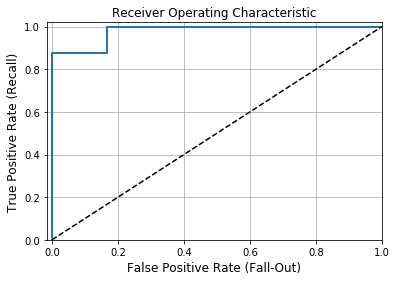

In [20]:
# Plotting graph with roc courve
plt.figure(figsize=(6, 4))
plot_roc_curve(fpr, tpr)
plt.show()